
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-09/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
3327,2019-07-31 08:37:40,YES,NO,YES,NO,YES,20180144,30390,2018-05-24 17:02:27,ORIGINAL FINAL,...,AI ANALYST,sharron.lillard@magellanlp.com,918-574-7327,918-574-7316,2018-05-24,SHARRON LILLARD,AI ANALYST,918-574-7327,sharron.lillard@magellanlp.com,"ON 4/26/18, A PIPELINE REHAB CREW WAS EXCAVATI..."
1125,2019-07-31 08:37:40,YES,NO,YES,YES,NO,20130098,18187,2013-03-14 17:09:49,SUPPLEMENTAL FINAL,...,DOT COORDINATOR,jeff.blatchford@p66.com,918-977-4206,NaN,2013-06-13,TODD TULLIO,REGULATORY COMPLIANCE MANAGER,832-765-1636,todd.l.tullio@p66.com,"AT 07:00, ODOR OF GASOLINE WAS REPORTED BY TER..."
653,2019-07-31 08:37:40,YES,NO,YES,YES,NO,20110451,19968,2011-12-15 16:42:54,SUPPLEMENTAL FINAL,...,SENIOR PIPELINE COMPLIANCE ENGINEER,smdavis@eprod.com,713-381-6487,NaN,2014-12-12,SUZIE DAVIS,SENIOR PIPELINE COMPLIANCE ENGINEER,713-381-6487,smdavis@eprod.com,AT 17:15 HRS PILOT CALLED ENTERPRISE EMPLOYEE ...
2334,2019-07-31 08:37:40,YES,NO,NO,NO,NO,20150468,21099,2015-12-21 08:29:41,SUPPLEMENTAL FINAL,...,COMPLIANCE COORDINATOR,kmckay@colpipe.com,601-765-9168,770-754-8489,2016-02-05,DREW LOHOFF,MANAGER PHMSA REGULATORY COMPLIANCE,678-762-2872,dlohoff@colpipe.com,ON 11/23/2015 AT 10:30 AN EMPLOYEE DETECTED PR...
2046,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20150179,20445,2015-05-14 15:04:04,ORIGINAL FINAL,...,PIPELINE COMPLIANCE SPECIALIST,candress@eprod.com,713-381-6426,NaN,2015-05-14,CHASE ANDRESS,PIPELINE COMPLIANCE SPECIALIST,713-381-6426,candress@eprod.com,AT APPROXIMATELY 17:15 ON 4/29/2015 LOCAL OPER...


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

In [5]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

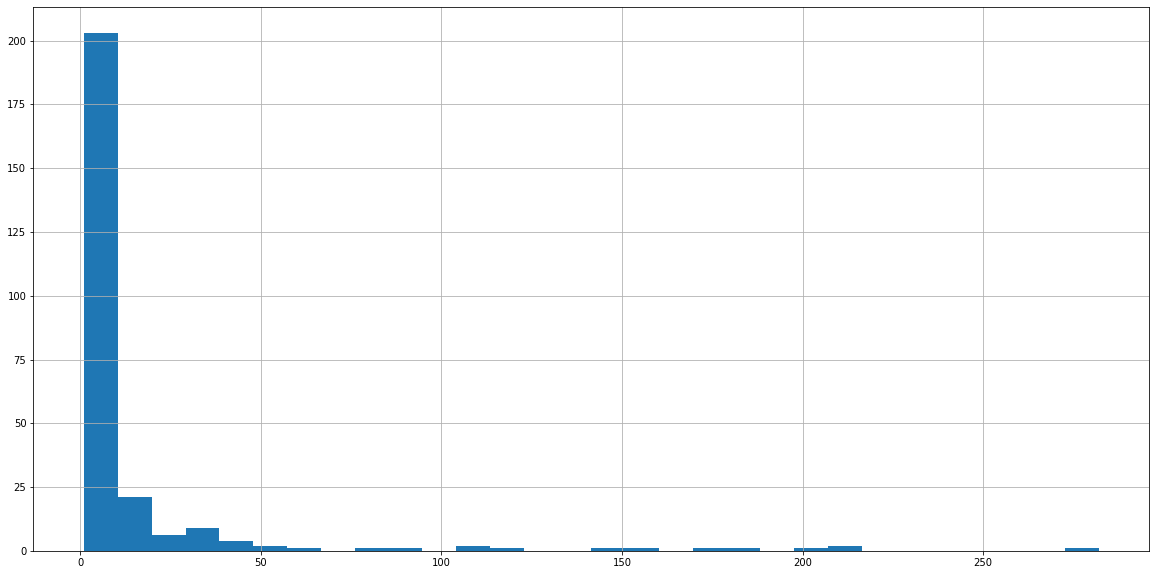

In [6]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [7]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [8]:
oil_pipelines = pd.read_excel('../data/pipelines_2010_present_2019-08-09/annual_hazardous_liquid_2010.xlsx', skiprows=2)

oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
113,2019-08-01 13:10:42,2010,20110406,10429,18718,SUNOCO PIPELINE L.P.,1818 Market St. Suite 1500,SINKING SPRING,PA,19103,...,0.0,0.0,0.0,34.00,23.00,11.00,INITIAL,2011-08-23 17:00:11,2011-08-23 17:00:11,7000-1.1 (Rev. 06-2011)
152,2019-08-01 13:10:42,2010,20110141,10143,26049,"COUNTRYMARK COOPERATIVE, LLP",225 S.E. ST. Suite 144,MT. VERNON,IN,46202-4059,...,0.0,0.0,0.0,69.00,18.00,51.00,INITIAL,2011-08-12 12:22:29,2011-08-12 12:22:29,7000-1.1 (Rev. 06-2011)
56,2019-08-01 13:10:42,2010,20110060,10061,5320,PROGRESS ENERGY FLORIDA,410 SOUTH WILMINGTON STREET,RALEIGH,NC,27601,...,0.0,0.0,0.0,33.65,33.65,0.00,INITIAL,2011-08-08 12:19:30,2011-08-08 12:19:30,7000-1.1 (Rev. 06-2011)
127,2019-08-01 13:10:42,2010,20110407,10704,20160,PL Midstream LLC,"4470 Bluebonnet Blvd., Suite C",HOUSTON,LA,70809,...,0.0,0.0,0.0,461.85,461.85,0.00,SUPPLEMENTAL,2011-08-24 13:22:01,2012-01-31 13:21:14,7000-1.1 (Rev. 06-2011)
190,2019-08-01 13:10:42,2010,20110341,11862,30709,HUNTSMAN PETROCHEMICAL LLC,10003 WOODLOCH FOREST DRIVE,THE WOODLANDS,TX,77380,...,0.0,0.0,0.0,15.91,7.27,8.64,SUPPLEMENTAL,2011-08-15 19:21:21,2013-05-31 13:57:07,7000-1.1 (Rev. 06-2011)


In [9]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipelines_2010_present_2019-08-09/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [10]:
pipelines = pd.concat([pd.read_excel(f'../data/pipelines_2010_present_2019-08-09/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
353,2019-08-01 13:58:36,2017,20183338,15865,32082,ARC TERMINALS,3000 RESEARCH FOREST DR. SUITE 250,THE WOODLANDS,TX,77381,...,0.0,0.0,0.0,1.559,0.353,1.206,INITIAL,2018-06-12 14:23:17,2018-06-12 14:23:17,7000-1.1 (Rev. 06-2014)
4269,2019-08-01 13:52:01,2016,20172378,14727,31189,BP PIPELINE (NORTH AMERICA) INC.,30S WACKER DRIVE,CHICAGO,IL,60606,...,0.0,0.0,0.0,121.000,45.000,76.000,INITIAL,2017-03-09 09:01:55,2017-03-09 09:01:55,7000-1.1 (Rev. 06-2014)
4912,2019-08-01 13:46:40,2015,20161842,14073,31057,"HECO - HAWAIIAN ELECTRIC COMPANY, INC.",900 RICHARDS STREET,HONOLULU,HI,96813,...,0.0,0.0,0.0,13.300,13.300,0.000,INITIAL,2016-05-27 12:31:24,2016-05-27 12:31:24,7000-1.1 (Rev. 06-2014)
1032,2019-08-01 13:14:22,2011,20120222,11260,31957,KINDER MORGAN WINK PIPELINE LP,"500 DALLAS, STE. 1000",HOUSTON,TX,77002,...,0.0,0.0,0.0,374.000,10.000,364.000,INITIAL,2012-06-13 12:03:13,2012-06-13 12:03:13,7000-1.1 (Rev. 06-2011)
1583,2019-08-01 13:39:40,2014,20151421,13548,32277,OXEA CORPORATION,2001 FM 3057,BAY CITY,TX,77414,...,0.0,0.0,0.0,51.000,51.000,0.000,INITIAL,2015-06-11 16:30:44,2015-06-11 16:30:44,7000-1.1 (Rev. 06-2014)


See which company has the vastest pipeline network.

In [11]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3634,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3704,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4723,2015,2552,COLONIAL PIPELINE CO,4500.920
4715,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3484,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4135,2016,15674,PLANTATION PIPE LINE CO,2564.730
4035,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


In [12]:
pipelines['PARTA5COMMODITY'].unique()

array(['Crude Oil', 'HVL', 'Refined and/or Petroleum Product (non-HVL)',
       'CO2', 'Fuel Grade Ethanol (dedicated system)'], dtype=object)

Compare to

In [13]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

The types correspond well, but the terminology is different.

## 2.3 Gas pipelines

In [14]:
gas_pipelines = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2015.xlsx', skiprows=1)

gas_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
4,2019-08-01 14:19:07,2015,20160322,595,1088,BALTIMORE GAS & ELECTRIC CO,Exelon Corporation,Ed Turowski,Manager Gas System Control & Plant Operations,Edward.Turowski@constellation.com,...,21201,INITIAL,2016-03-11 07:47:54,2016-03-11 07:47:54,7100.3-1 (Rev. 10-2014),Edward Turowski,Manager Gas System Control & Plant Operations,Edward.Turowski@constellation.com,(410)470-6410,(410)470-6403
74,2019-08-01 14:19:07,2015,20160273,736,32561,ECOELECTRICA L.P.,NaN,oSCAR CEDEñO,TERMINAL MANAGER,OSCAR.CEDENO@ECOELECTRICA.COM,...,00624,SUPPLEMENTAL,2016-02-13 14:27:23,2017-04-21 09:03:15,7100.3-1 (Rev. 10-2014),Oscar Cedeno,Terminal Manager,oscar.cedeno@ecoelectrica.com,(787)487-6042,(787)836-2250
81,2019-08-01 14:19:07,2015,20160295,654,39092,TITAN ALASKA LNG,NaN,Brendan Kern,Engineer,bkern@fngas.com,...,99701,SUPPLEMENTAL,2016-03-02 13:48:24,2017-01-31 16:09:28,7100.3-1 (Rev. 10-2014),Brendan Kern,Operator,bkern@fngas.com,(907)799-0987,NaN
55,2019-08-01 14:19:07,2015,20160255,519,19570,TRANSCONTINENTAL GAS PIPE LINE COMPANY,NaN,Johnny Lopez,Regulatory & Compliance Specialist,johnny.lopez@williams.com,...,77056,INITIAL,2016-01-12 09:15:11,2016-01-12 09:15:11,7100.3-1 (Rev. 10-2014),johnny lopez,Regulatory & Compliance Specialist,johnny.lopez@williams.com,(713) 215-2995,NaN
70,2019-08-01 14:19:07,2015,20160302,573,32206,"FREEPORT LNG DEVELOPMENT, L.P.",NaN,Michael Stephenson,Regulatory Compliance Specialist,Mstephenson@freeportlng.com,...,77002,INITIAL,2016-03-07 10:34:38,2016-03-07 10:34:38,7100.3-1 (Rev. 10-2014),Michael Stephenson,agent,Mstephenson@freeportlng.com,(979)415-8728,(979)415-8733


In [15]:
gas_files = [file for file in listdir('../data/gas_2010_present_2019-08-09/') if'annual_liquefied_natural_gas' in file]
gas_files

['annual_liquefied_natural_gas_2013.xlsx',
 'annual_liquefied_natural_gas_2011.xlsx',
 'annual_liquefied_natural_gas_2016.xlsx',
 'annual_liquefied_natural_gas_2012.xlsx',
 'annual_liquefied_natural_gas_2017.xlsx',
 'annual_liquefied_natural_gas_2018.xlsx',
 'annual_liquefied_natural_gas_2010.xlsx',
 'annual_liquefied_natural_gas_2014.xlsx',
 'annual_liquefied_natural_gas_2015.xlsx']

In [16]:
gas = pd.concat([pd.read_excel(f'../data/gas_2010_present_2019-08-09/{file}', skiprows=1) for file in gas_files[:3]], sort=False)
gas = gas.reset_index(drop = True)

gas.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
60,2019-08-01 14:16:07,2013,20140140,358,22777,WISCONSIN ELECTRIC POWER COMPANY DBA WE ENERGIES,Wisconsin Energy Corporation,Tim Strommen,MANAGER REGULATORY COMPLIANCE,tim.strommen@we-energies.com,...,53203,INITIAL,2014-03-11 11:47:20,2014-03-11 11:47:20,7100.3-1 (Rev. 06-2011),Todd Gretebeck,Manager - LNG/Propane Plant Operations,todd.gretebeck@we-energies.com,(414) 221-5378,(414) 571-3593
170,2019-08-01 14:20:39,2016,20170352,657,1800,KEYSPAN ENERGY DELIVERY - NY CITY,National Grid,Thomas Smith,"Director, NY LNG",tsmith3@nationalgrid.com,...,02451,INITIAL,2017-02-03 06:43:31,2017-02-03 06:43:31,7100.3-1 (Rev. 10-2014),Steve Sechovicz,Principle Engineer,stephen.sechovicz@nationalgrid.com,(617)822-5412,NaN
157,2019-08-01 14:12:58,2011,20120044,174,32220,"GOLDEN PASS LNG TERMINAL, LLC",NaN,Steven Andrews,HSE Supervisor,steven.l.andrews@gpterminal.com,...,77002,SUPPLEMENTAL,2012-03-13 13:25:41,2013-02-25 15:08:59,7100.3-1 (Rev. 06-2011),Steven Andrews,HSE Supervisor,steven.l.andrews@gpterminal.com,(409) 971-4205,(409) 971-4275
19,2019-08-01 14:16:07,2013,20140099,309,4350,ELIZABETHTOWN GAS CO,AGL Resources,Ralph T. McCollum,Sr. Compliance Engineer,rmccollu@aglresources.com,...,07922,INITIAL,2014-01-30 11:14:59,2014-01-30 11:14:59,7100.3-1 (Rev. 06-2011),Ralph T. McCollum,Sr. Compliance Engineer,rmccollu@aglresources.com,(404) 584-3733,(404) 584-4807
115,2019-08-01 14:12:58,2011,20120039,285,13299,NEW JERSEY NATURAL GAS CO,NaN,Kraig Sanders,"Manager, Pressure Meas. and Transmission",ksanders@njng.com,...,07719,SUPPLEMENTAL,2012-03-09 13:23:51,2013-04-23 10:34:28,7100.3-1 (Rev. 06-2011),Kraig Sanders,"Manager, Pressure Meas. and Transmission",ksanders@njng.com,(732) 938-1188,(732) 919-0735


The warning stems from the fact that the PARTA4NAMEOFCOMP columns was dropped, starting from 2014 (see below). Fortunately, we can use the field "PARTA2NAMEOFCOMP" and "PARTA2NAMEOFPARENT_COM" to get the information.

In [17]:
gas_columns_2010 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2010.xlsx', skiprows=1, skipfooter=999).columns.tolist()
gas_columns_2014 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2014.xlsx', skiprows=1, skipfooter=999).columns.tolist()
set(gas_columns_2010) - set(gas_columns_2014)

{'PARTA4NAMEOFCOMP'}

## 2.4. Where do incidents occur? Regular, or LNG pipelines?

### 2.4.1 Are there operators who operate both regular and LNG pipelines?

In [18]:
gas_operators = np.unique(gas['OPERATOR_ID']).tolist()
gas_operators[:5]

[180, 630, 792, 909, 1088]

In [19]:
pipeline_operators = np.unique(pipelines['OPERATOR_ID']).tolist()
pipeline_operators[:5]

[300, 395, 401, 402, 473]

In [20]:
common_operators = set(gas_operators).intersection(set(pipeline_operators))
print(common_operators)

{31636}


Only one company occurs on both lists.

In [21]:
pipelines.loc[pipelines['OPERATOR_ID'].isin(common_operators) & (pipelines['REPORT_YEAR'] == 2017)]['PARTA2NAMEOFCOMP'].tolist()

['NORTHERN STATES POWER CO OF MINNESOTA']

### 2.4.2 Where do the accidents occur?

In [22]:
incidents.loc[incidents['OPERATOR_ID'] == 31636]

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


Our common operators has no incidents, so we can ignore this segment.

In [23]:
regular_pipeline_incidents = incidents['OPERATOR_ID'].isin(pipelines['OPERATOR_ID']).sum()
regular_pipeline_incidents

3814

In [24]:
nlg_pipeline_incidents = incidents['OPERATOR_ID'].isin(gas['OPERATOR_ID']).sum()
nlg_pipeline_incidents

0

Looks like we can ignore this second dataset for our analysis.

## 2.5 FERC Notices

In [25]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [26]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64